This is my approach to linear regression problem. 

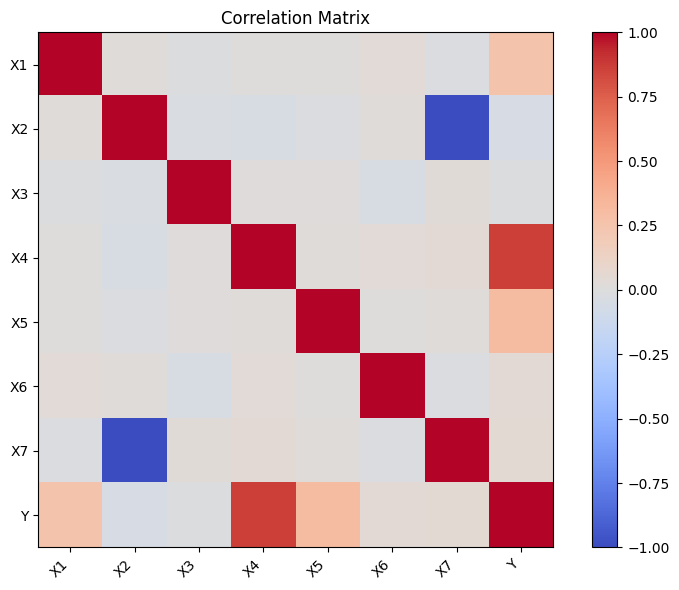

In [1]:
import numpy as np
from linear_regression import filename, LinearRegressionModel, StopCondition, RidgeRegressionFunction, Uninomial, \
    QuadraticLossFunction, Linear, LassoRegressionFunction, Zeros, Custom, Gaussian, ElasticNetworkLossFunction

model = LinearRegressionModel(filename, True)
model.set_parameters(loss_function=QuadraticLossFunction(), base_function=Linear())
model.corr()

[[0, np.float64(14366.741664882891)], [0.0001, np.float64(14366.742698050448)], [0.001, np.float64(14366.751999087877)], [0.002, np.float64(14366.762338914445)], [0.005, np.float64(14366.793392123845)], [0.01, np.float64(14366.845259905149)], [0.02, np.float64(14366.949417088741)], [0.05, np.float64(14367.265261607969)], [0.1, np.float64(14367.80291236789)], [1, np.float64(14379.883866006106)], [2, np.float64(14398.647681070152)], [5, np.float64(14482.627223133199)], [10, np.float64(14676.205275466195)]]


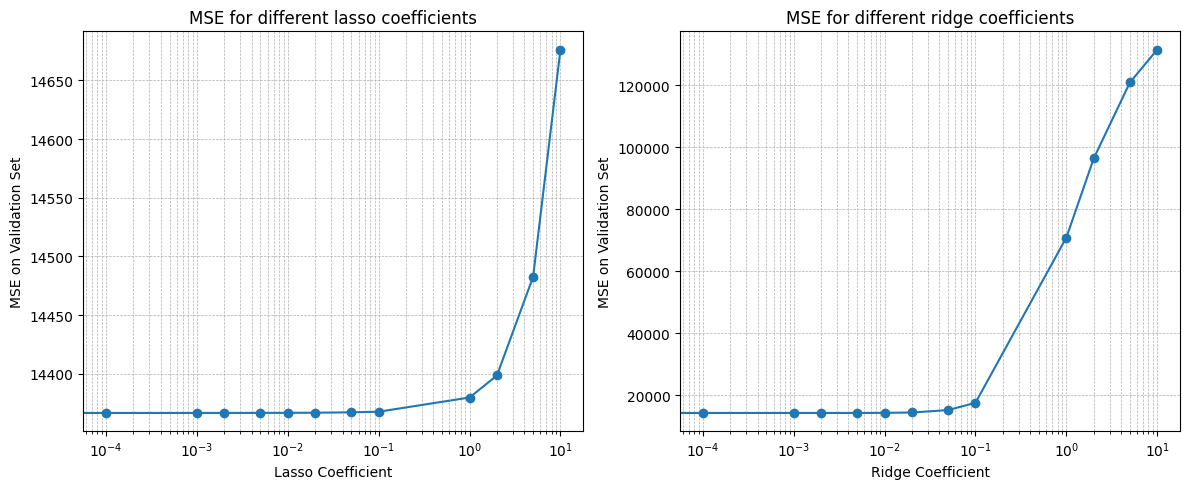

In [6]:
# a, b = model.estimate_coef()

import matplotlib.pyplot as plt
print(model.lr)

def plot_reg_coef(self):
    # Unpack the data
    coef = [item[0] for item in self.lr]
    lasso = [item[1] for item in self.lr]
    ridge = [item[1] for item in self.rr]

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Lasso plot
    axs[0].plot(coef, lasso, marker='o', color='tab:blue')
    axs[0].set_title('MSE for different lasso coefficients')
    axs[0].set_xlabel('Lasso Coefficient')
    axs[0].set_ylabel('MSE on Validation Set')
    axs[0].set_xscale('log')
    axs[0].grid(True, which="both", linestyle='--', linewidth=0.5)

    # Ridge plot
    axs[1].plot(coef, ridge, marker='o', color='tab:blue')
    axs[1].set_title('MSE for different ridge coefficients')
    axs[1].set_xlabel('Ridge Coefficient')
    axs[1].set_ylabel('MSE on Validation Set')
    axs[1].set_xscale('log')
    axs[1].grid(True, which="both", linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()
    
plot_reg_coef(model)

In [6]:

diff_2 = lambda x: [*[x[i] for i in range(8)],
                      *[x[i] * x[j] for i in range(1, 8) for j in range(i, 8)]]
diff_3 = lambda x: [*[x[i] for i in range(8)],
                      *[x[i] * x[j] for i in range(1, 8) for j in range(i, 8)],
                      *[x[i] * x[j] * x[k] for i in range(1, 8) for j in range(i, 8) for k in range(j, 8)]]
func = Custom()
func.setdiff(diff_3)
model.set_parameters(base_function=func)

In [7]:

model.set_parameters(eta=0.01, stop=0.005, rep_count=4000, condition=StopCondition.Both)
model.set_parameters(mini_batch=True   , batch_size=64, print_c=10)
model.linear_regression()

10: Gradient: 1490.5566886808142, MSE: 155557.31472517058
20: Gradient: 636.3212712271417, MSE: 83335.57902046182
30: Gradient: 818.952481304292, MSE: 71296.87957703978
40: Gradient: 507.3778401080183, MSE: 65919.04417125194
50: Gradient: 430.78054376136, MSE: 62411.81030381549
60: Gradient: 591.6943411898196, MSE: 60214.30010099997
70: Gradient: 448.6320953712656, MSE: 56982.78944170714
80: Gradient: 575.4950751015587, MSE: 55602.48719846833
90: Gradient: 352.4013570685639, MSE: 53298.03864681176
100: Gradient: 600.380623315336, MSE: 51931.868384172325
110: Gradient: 501.41157898013597, MSE: 50626.70858173948
120: Gradient: 463.8027115115289, MSE: 49600.81685122156
130: Gradient: 456.711186329605, MSE: 48560.125985301835
140: Gradient: 498.9075096571181, MSE: 47716.31701131783
150: Gradient: 339.2695933023558, MSE: 46910.011875283286
160: Gradient: 409.6577913719119, MSE: 46141.82852161887
170: Gradient: 382.4055533150663, MSE: 45344.270990023186
180: Gradient: 557.3681172559441, MSE:

[np.float64(947.6015141415073),
 np.float64(82.38524796001334),
 np.float64(-0.007059521399151891),
 np.float64(-0.19015061169474515),
 np.float64(398.3992890851151),
 np.float64(106.2074453379974),
 np.float64(0.21320634974443703),
 np.float64(0.0069616182577887376),
 np.float64(-9.556586525847585),
 np.float64(-0.016505234354157197),
 np.float64(83.2326571941488),
 np.float64(0.08546132629507941),
 np.float64(-0.14502021596130557),
 np.float64(-0.29540467493146205),
 np.float64(0.01641236792770364),
 np.float64(-0.2090946255551244),
 np.float64(-0.376788689013377),
 np.float64(-0.40105501590806725),
 np.float64(-0.18672207817415584),
 np.float64(-0.32293205123024027),
 np.float64(0.20073639078178476),
 np.float64(0.1701087685153044),
 np.float64(-0.1947230467207862),
 np.float64(0.00647414624516917),
 np.float64(-0.029881837487042623),
 np.float64(0.37674095479487935),
 np.float64(27.641738523892204),
 np.float64(96.13522589961478),
 np.float64(0.09175636767471056),
 np.float64(0.400

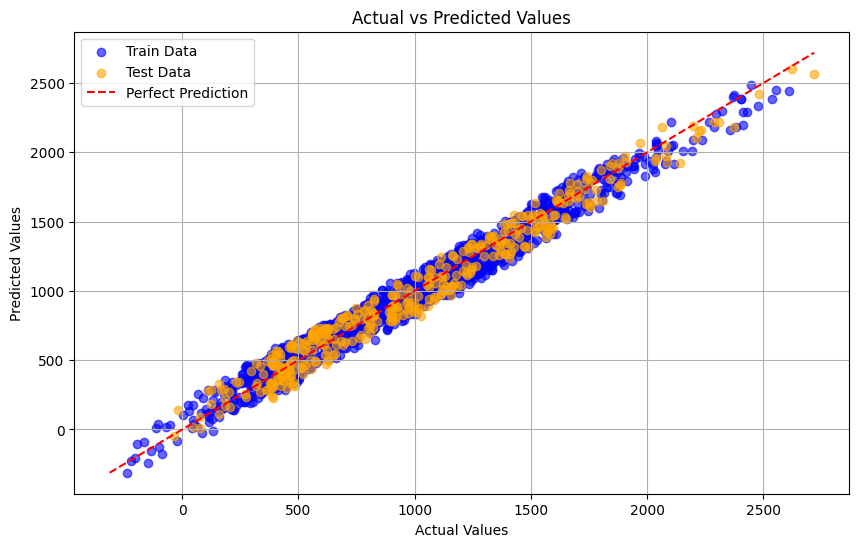

Train Set MSE: 4284.460963663435
Test Set MSE: 4346.407749644133


In [8]:
model.print_results()
model.results()

In [9]:
model.set_parameters(base_function=Linear())
model.solve_analytically(0.1)
print(model.theta)

[ 9.63491986e+02  1.32948800e+02 -7.47260159e+00 -6.45952771e+00
  4.53040103e+02  1.49335854e+02 -2.72226749e-01  7.47260159e+00]


In [7]:
from random import randrange
i = randrange(0, len(model.test) - 1, 1)
p = model.prediction([1, *[model.test[i][j] for j in range(len(model.test[0]) - 1)]])
a = model.test[i][-1]
np.set_printoptions(precision=2)
print(f"prediction: {"%0.2f" %  p}. actual: {"%0.2f" %  a}, error = {"%0.2f" % (abs(p - a) / a * 100)}%")

TypeError: must be real number, not NoneType

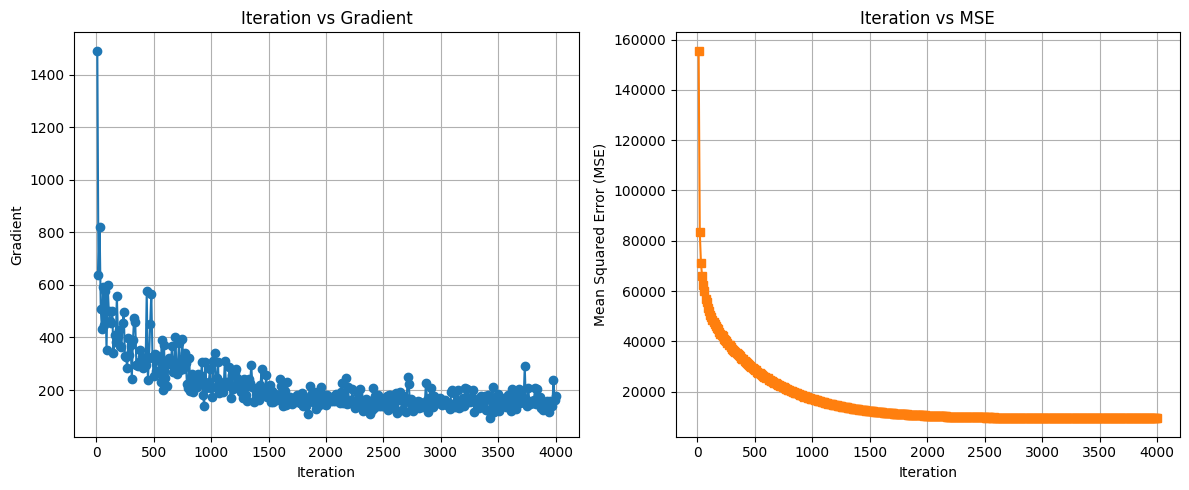

In [9]:
model.plot_learning_curves()

In [13]:
for l in [0.000001, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 1000, 100000]:
    print(f"\lambda = {l}")
    model.set_parameters(base_function=Linear())
    model.solve_analytically(l)
    model.results()

\lambda = 1e-06
Train Set MSE: 14358.691677403103
Test Set MSE: 14980.064897267397
\lambda = 0.1
Train Set MSE: 14358.69573867741
Test Set MSE: 14980.808826036307
\lambda = 0.2
Train Set MSE: 14358.70791980364
Test Set MSE: 14981.560596652404
\lambda = 0.5
Train Set MSE: 14358.793141866692
Test Set MSE: 14983.863478463305
\lambda = 1
Train Set MSE: 14359.097198659645
Test Set MSE: 14987.859942694697
\lambda = 2
Train Set MSE: 14360.311074668763
Test Set MSE: 14996.444815027418
\lambda = 5
Train Set MSE: 14368.7627646708
Test Set MSE: 15026.899482507795
\lambda = 10
Train Set MSE: 14398.645020873144
Test Set MSE: 15093.090208282225
\lambda = 20
Train Set MSE: 14515.905518953572
Test Set MSE: 15281.631885426723
\lambda = 50
Train Set MSE: 15294.84736200888
Test Set MSE: 16264.228724054556
\lambda = 100
Train Set MSE: 17821.78513157463
Test Set MSE: 19099.65484573736
\lambda = 1000
Train Set MSE: 135659.71446718177
Test Set MSE: 139351.75394427477
\lambda = 100000
Train Set MSE: 590708.42

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
/var/folders/s_/sc3gqd2x5bjbkk3gf91ynjf00000gn/T/ipykernel_57970/2083666583.py:2: SyntaxWarning: invalid escape sequence '\l'
  print(f"\lambda = {l}")


In [41]:
batch_size = 512
model.set_parameters(base_function=Linear())
model.set_parameters(eta=0.01, stop=0.005, rep_count=1000, condition=StopCondition.Both)
model.set_parameters(mini_batch=True   , batch_size=batch_size, print_c=10)
model.linear_regression()

10: Gradient: 1012.6779833844123, MSE: 525757.2596029683
20: Gradient: 875.3410417785954, MSE: 432151.2799894036
30: Gradient: 815.5935903159867, MSE: 354853.40610865504
40: Gradient: 792.6766159310247, MSE: 292610.31786860107
50: Gradient: 670.889131722234, MSE: 240982.74006264049
60: Gradient: 620.2190118910767, MSE: 199697.1215536491
70: Gradient: 537.2438575672554, MSE: 165569.86684517597
80: Gradient: 515.8309399255036, MSE: 137650.67918305943
90: Gradient: 457.5674773281403, MSE: 114892.73848089066
100: Gradient: 407.76559270553645, MSE: 96330.12660905583
110: Gradient: 359.39461537817454, MSE: 81308.66112677546
120: Gradient: 349.8662414129542, MSE: 69298.31121506929
130: Gradient: 313.32740238936105, MSE: 59109.466605937414
140: Gradient: 282.11547393044606, MSE: 50922.092912810054
150: Gradient: 252.2149754980442, MSE: 44003.292455652096
160: Gradient: 231.871660300769, MSE: 38465.27306171377
170: Gradient: 205.55506443621, MSE: 34050.49233072083
180: Gradient: 184.98283481571

[np.float64(982.8767571540806),
 np.float64(135.2182542265919),
 np.float64(-3.686894022412749),
 np.float64(-11.534323401973767),
 np.float64(465.4528900511953),
 np.float64(150.76117151228823),
 np.float64(1.4670461815672593),
 np.float64(3.686894022412749)]

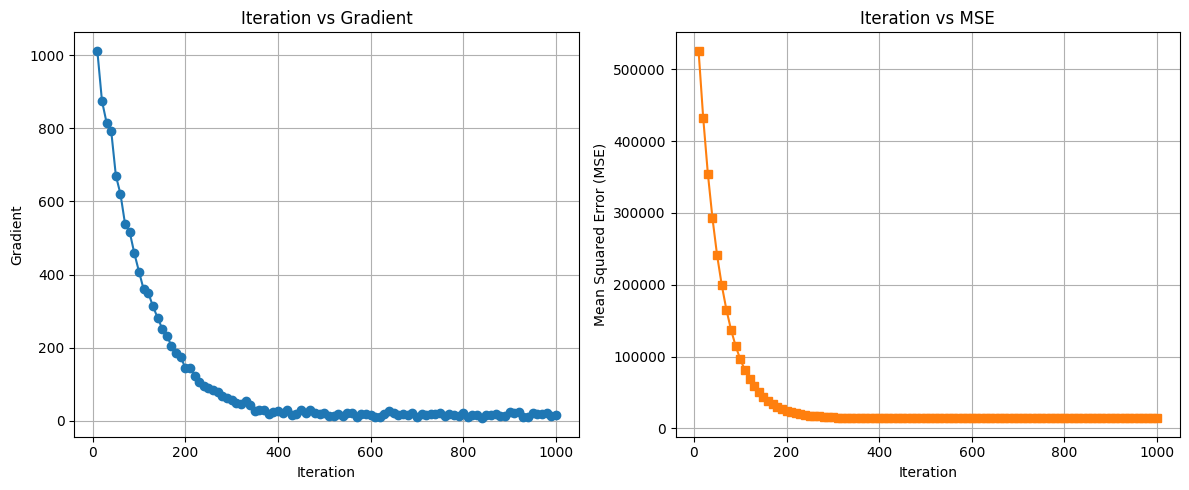

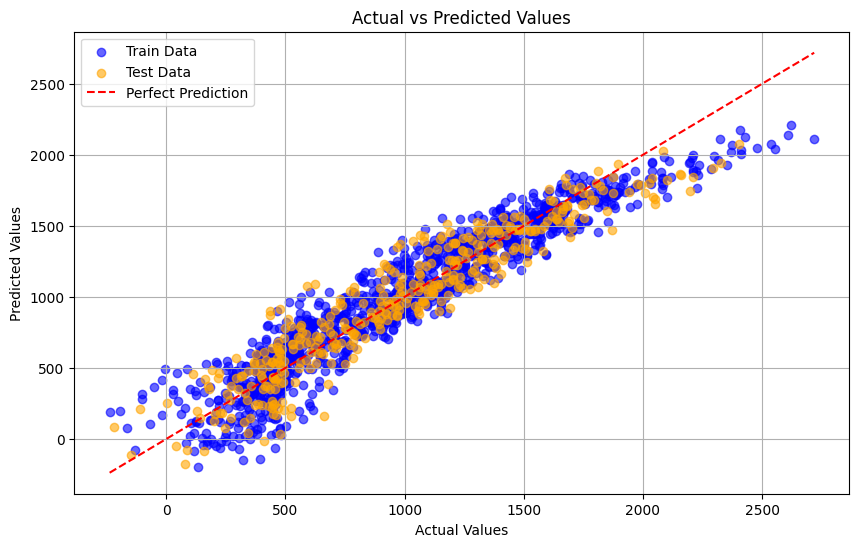

Train Set MSE: 14126.153991983667
Test Set MSE: 14633.804680905068


In [42]:
model.plot_learning_curves()
model.print_results()
model.results()